## Assignment 5
### Author: Emily McAfee
#### Breat Cancer Detection

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# Read in data
filename = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/WI_Breast_Cancer.csv"

bcdf = pd.read_csv(filename, header = None)

In [3]:
# Check data
bcdf.head()
bcdf.dtypes

0      object
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [4]:
# Check for NA's
sum(bcdf.isna())

55

In [5]:
# Get rid of rows with NAs
bcdf1 = bcdf.dropna()

In [6]:
# Check to make sure NAs are gone
bcdf1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [7]:
# Clean data
# Get rid of rows we don't want
bcdf2 = bcdf1.drop(0, axis = 1)
bcdf2.dtypes

1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [8]:
# Rename class variable
bcdf2.rename(columns = {1:'class'}, inplace = True)
bcdf2.head()

,class,2,3,4,5,6,7,8,9,10
0,2,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,2,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,2,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1


In [9]:
# Change class to numeric column
bcdf2['class'] = pd.to_numeric(bcdf2['class'])
bcdf2.dtypes

class      int64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10        object
dtype: object

In [10]:
# Change Class to zero/ones for readability
bcdf2['class'] = bcdf2['class'].replace(4, 1)
bcdf2['class'] = bcdf2['class'].replace(2, 0)

print(bcdf2.head())
bcdf2.iloc[:,0].unique()

   class    2    3    4    5    6     7    8    9 10
0      0  5.0  1.0  1.0  1.0  2.0   1.0  3.0  1.0  1
1      0  5.0  4.0  4.0  5.0  7.0  10.0  3.0  2.0  1
2      0  3.0  1.0  1.0  1.0  2.0   2.0  3.0  1.0  1
3      0  6.0  8.0  8.0  1.0  3.0   4.0  3.0  7.0  1
4      0  4.0  1.0  1.0  3.0  2.0   1.0  3.0  1.0  1


array([0, 1])

In [11]:
# Change last column to numeric
# We see we have a string in this column so let's look into that
bcdf2[10].unique()

array(['1', '5', '4', '2', '3', '7', '10', '8', '6',
       '3) <-----Reappears in Group 8 as:', '3 '], dtype=object)

In [12]:
bcdf2[10].value_counts()

1                                    579
2                                     35
3                                     33
10                                    14
4                                     12
7                                      9
8                                      8
5                                      6
6                                      3
3                                      1
3) <-----Reappears in Group 8 as:      1
Name: 10, dtype: int64

In [13]:
# Looks like we can get rid of them without too much impact
bcdf3 = bcdf2.loc[bcdf[10] != '3) <-----Reappears in Group 8 as:']
bcdf3 = bcdf3.loc[bcdf[10] != '3 ']

In [14]:
# Check data
bcdf3[10].value_counts()

# Make numeric
bcdf3[10] = pd.to_numeric(bcdf3[10])

# Check data
bcdf3.dtypes

class      int64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10         int64
dtype: object

In [15]:
# Move class column to end
move = bcdf3.pop('class')
bcdf3['class'] = move
bcdf3.head()

,2,3,4,5,6,7,8,9,10,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1,0


### 1. Test both entropy and gini coefficient

In [16]:
# Set features and target
x = bcdf3.iloc[:, 0:9]
y = bcdf3.iloc[:, 9]

In [17]:
# Split the training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [18]:
# Generate and evaluate the model
from sklearn.tree import DecisionTreeClassifier

# ENTROPY
# Use entropy (no limit on samples or split)
model_ent = DecisionTreeClassifier(criterion = 'entropy'). fit(x_train, y_train)
y_ent_pred = model_ent.predict(x_test)

# GINI
# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf = 3).fit(x_train, y_train)
y_gini_pred = model_gini.predict(x_test)

In [19]:
# Look at accuracies
from sklearn.metrics import accuracy_score

print("Entropy accuracy: ", accuracy_score(y_test, y_ent_pred)*100)
print("Gini accuracy:", accuracy_score(y_test, y_gini_pred)*100)

Entropy accuracy:  92.85714285714286
Gini accuracy: 95.71428571428572


#### Which performs better and why?
When running the models initially with the minimum (and random) number of leaves at 4, we get pretty high and similar accuracies for both models (entropy = 92.86%, gini = 94.29%). As we change the hyperparameter of minimum leaves upward to 5, 7, etc. We can see that the accuracy decreases. When we change the minimum number of leaves to 3 for the gini model, we get a highest accuracy (95.71%). This is likely because gini measures how often a randomly chosen element from the set would be incorrectly labeled, by limiting the leaves to 3, we are creating a more strinngent criteria and thus reducing the chances of an incorrect classification. See below for other parameter testing

### 2. What are the best hyperparameter settings for both?

We tested the minn_impurity_split, max_leaf_nodes, and min_samples_leaf subparameters for both entopy and gini to explore our best options. We found that increasing the minimum at which to split the impurity decreases both entropy and gini. We found that making both limited to a binary split (max_leaf_nodes = 2) decreased the accuracy to both models to aboout 92%, which is not bad but nont our highest accuracy we've gotten. Lastly, we only considered splits with multiple values (minn_samples_leaf). Interestinging. we found the highest accuracy for gini with a hyperparameter of 3, while this same value decreased our entropy accuracy to 88%. 


We found the best hyperparamters for the entropy model to be default values with an accuracy of 91%. By requiring a minimum of 3 leaf samples for the gini model, we were able to get model accuracy up to 95%.

### 3. Visualize both models and see which feature is selected for each criterion. Are they the same for both? Why or why not?

In [20]:
# Create confusion matrix for both models
from sklearn.metrics import confusion_matrix

# ENTROPY
print(pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns = ['Predicted Cancer', 'Predicted No Cancer'],
    index = ['True Cancer', 'True No Cancer']
))


# GINI
pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns = ['Predicted Cancer', 'Predicted No Cancer'],
    index = ['True Cancer', 'True No Cancer']
)

                Predicted Cancer  Predicted No Cancer
True Cancer                   45                    1
True No Cancer                 4                   20


,Predicted Cancer,Predicted No Cancer
True Cancer,45,1
True No Cancer,2,22


In [21]:
bcdf3.columns

Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 'class'], dtype='object')

In [22]:
# Rename columns for readability
bcdf3.rename(columns = {2:'clumpthickness', 3: 'unicellsize',
                        4:'unicellshape', 5:'margadhesion',
                        6:'singlecellsize', 7:'barenuclei',
                        8:'blandchro', 9:'normnucleoli',
                        10:'mitosis'}, inplace = True)
bcdf3.dtypes

clumpthickness    float64
unicellsize       float64
unicellshape      float64
margadhesion      float64
singlecellsize    float64
barenuclei        float64
blandchro         float64
normnucleoli      float64
mitosis             int64
class               int64
dtype: object

In [23]:
# Create visualization for both models
# ENTROPY
from sklearn import tree
!pip install graphviz
!pip install pydot2

In [24]:
import graphviz
#import pydot2

dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile, feature_names = bcdf3.columns[0:9])
dotfile.close()

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png'])


0

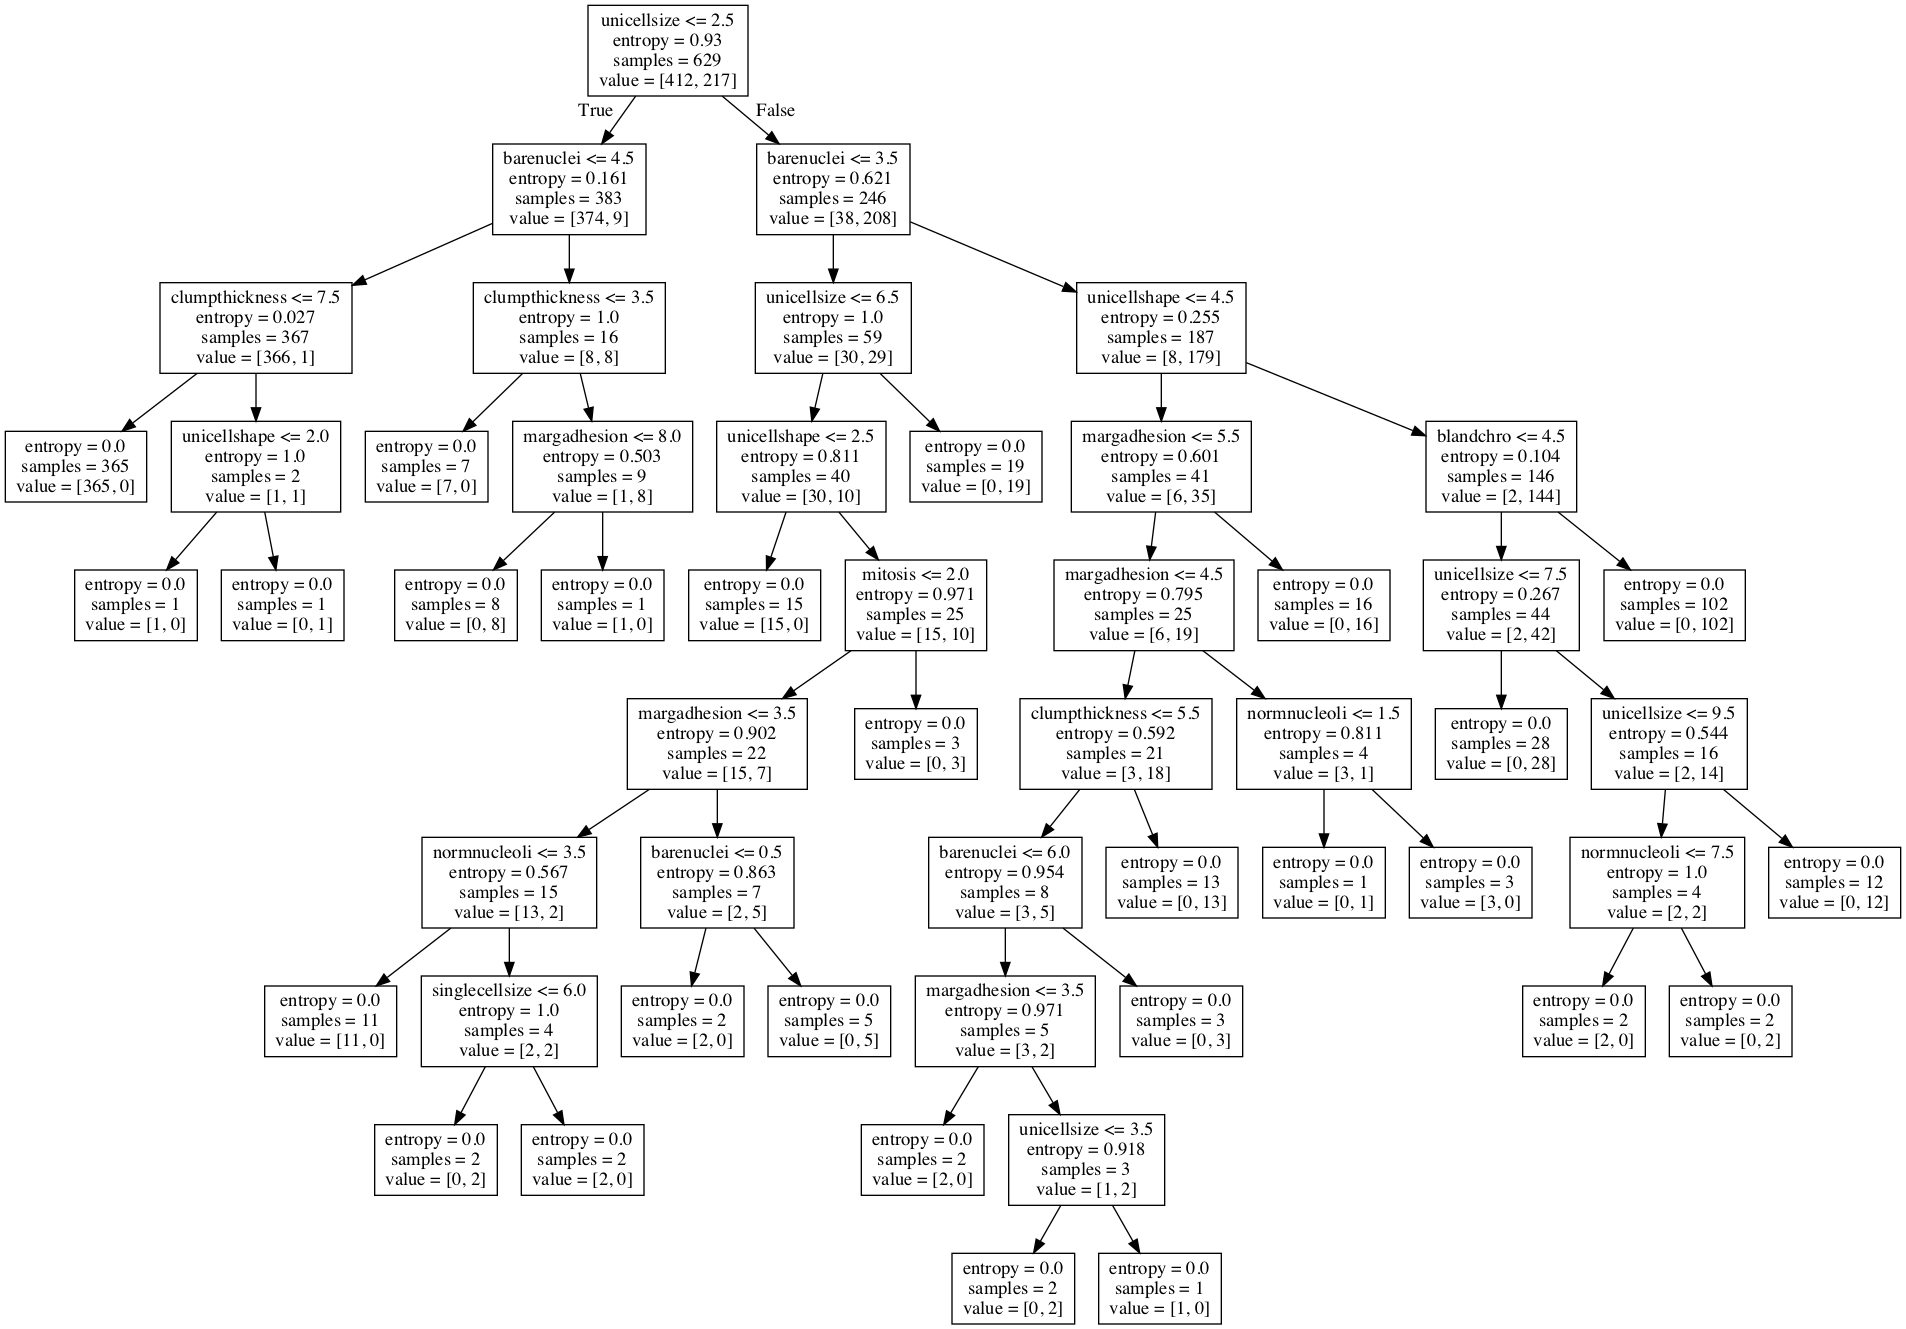

In [25]:
# Show the png
from IPython.display import Image
Image(filename = 'dtree.png', width = 1000, height = 1000)

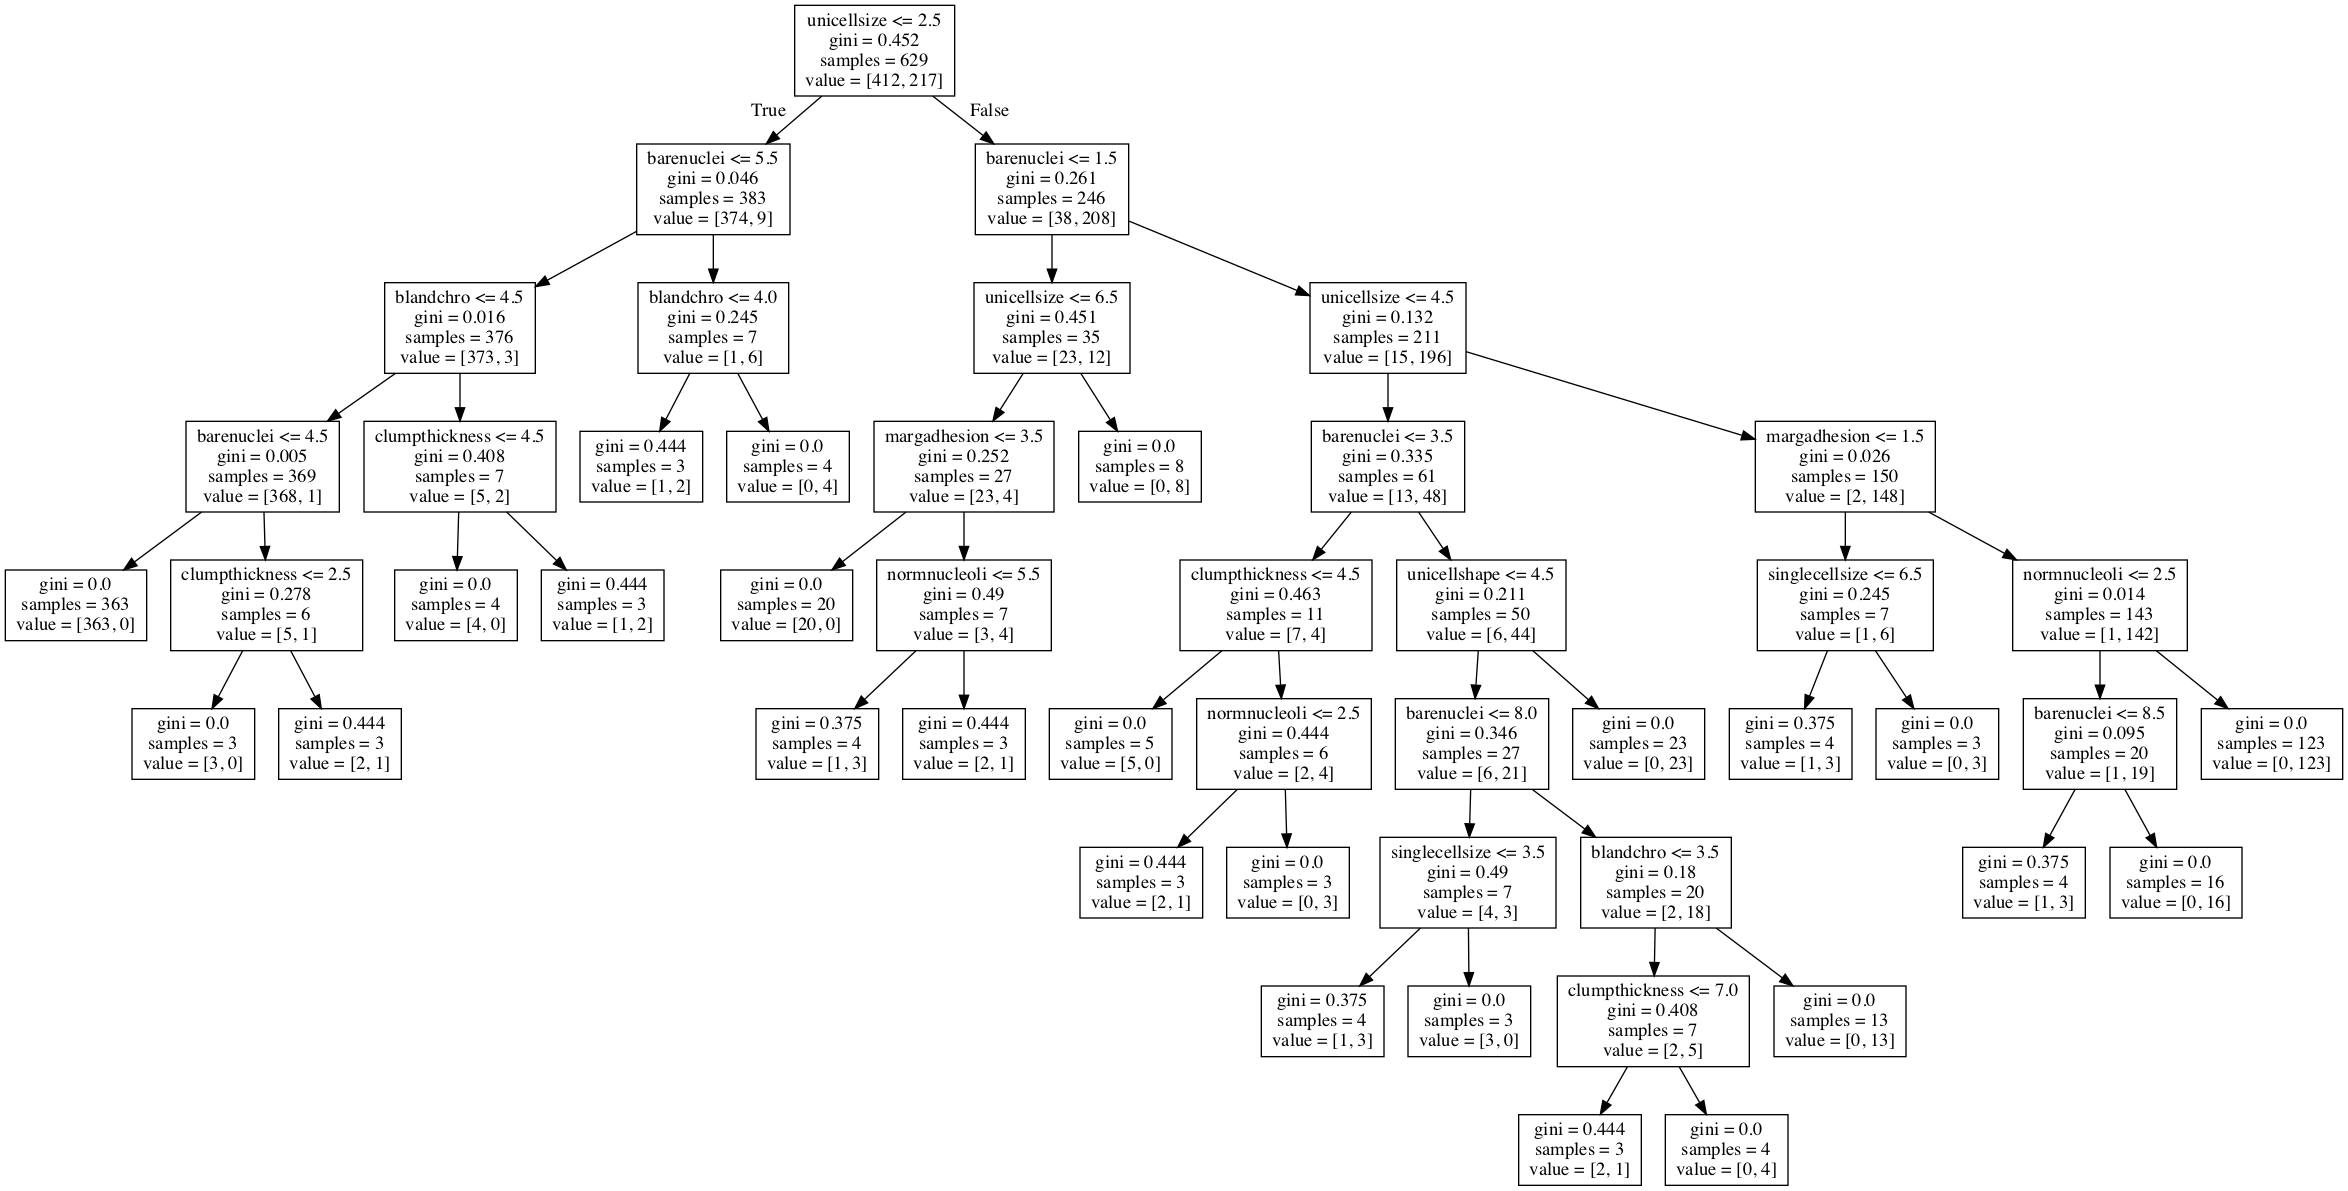

In [26]:
# GINI
dotfile = open("dtree1.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = bcdf3.columns[0:9])
dotfile.close()

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot', '-Tpng', 'dtree1.dot', '-o', 'dtree1.png'])

# Show the png
from IPython.display import Image
Image(filename = 'dtree1.png', width = 1000, height = 1000)

By looking at both of our trees we can see that 'uniformity of cell size' is the main feature selected. In entropy we can see that the next splitting feature is 'barenuclei', followed by 'clumpthickness', ending with 'unicellshape.' For gini we have 'barenuclei' followed by 'blandchro', then 'barenuclei', then lastly 'clumpthickness'. Withinn their top four splitting features there are similarities across models. While they may not have the same order, having the same top features is a nice consistency, as it shows with features are likley most predective. However, the two models are still not exactly the same. This is becasue both entropy and gini measure differnt things. Entropy measures oour information (or lack of), while gini measures the probability of a random sample being classified incorrectly if we pick a random label. They are working on the same data, and are thus different sides of the same coin in giving us information about our tree.

### 4. Determine the AUC for the best model you can achieve. What are the precision and recall values annd which might want too be the one youo want to maximize?

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model_gini.predict_proba(x_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9551630434782608


In [28]:
# Find precision/recall
y_true = y_test
y_pred = y_gini_pred

from sklearn.metrics import classification_report
classification_report(y_true, y_pred, output_dict = True)

# Can also use (for binary classifiers)
# from sklearn.metrics import precision_recall_fscore_support
# precision_recall_fscore_support(y_true, y_pred, average = 'binary')

{'0': {'precision': 0.9574468085106383,
  'recall': 0.9782608695652174,
  'f1-score': 0.967741935483871,
  'support': 46},
 '1': {'precision': 0.9565217391304348,
  'recall': 0.9166666666666666,
  'f1-score': 0.9361702127659574,
  'support': 24},
 'accuracy': 0.9571428571428572,
 'macro avg': {'precision': 0.9569842738205365,
  'recall': 0.947463768115942,
  'f1-score': 0.9519560741249142,
  'support': 70},
 'weighted avg': {'precision': 0.9571296418659971,
  'recall': 0.9571428571428572,
  'f1-score': 0.9569173448377291,
  'support': 70}}

Our precision for correctly identifying the presence of breast cancer is 95%. While this may seem like a very high accuracy, this meanns that 5% of the time, we are still not correct in identifying cancerous tumors. But, that can be seen as not too large ofo a deterrant, as telling someone they have cancer and it turns out they don't is not as bad as telling someone they do not have cancer and they end up having it (even though that's still pretty bad but we won't get into that). Working with this, we have our recall, or sensitivity, which is 85%. This means that we are only able to detect 85% of the total cancer patients correctly - that's not good! If we were to maximize one of these values it would nneed to be the recall.

### 5. What are the implications of using this type of machine learning algorithm for breast cancer analysis?
For the detection of cancer patients, our high precision and low recall is not a good mixture for this type of analysis. The 85% recall is not at an acceptable level for identifying cancer patients. This type of analysis is a great illustration of how 85% may be a good level of recall for, say, predicting success of a new product, but not for something where human lives depend on it. This brings to light the importance of domain knowledge in data science and is a great starting poinnt for discussions on ethics and 'can' v. 'should' in this profession.